<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/10_regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



##Funkjca sigmoid

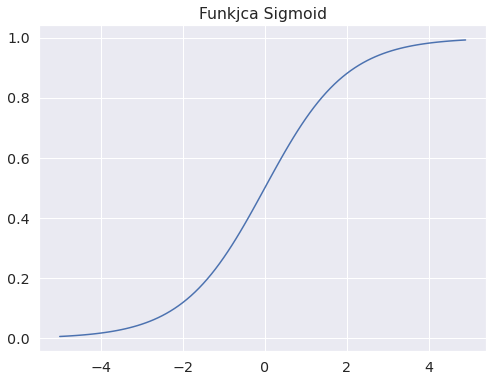

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5,5,0.1)
y = sigmoid(X)

plt.figure(figsize=(8,6))
plt.plot(X,y)
plt.title('Funkjca Sigmoid')
plt.show()

##Dane

In [6]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'data shape: {data.shape}')
print(f'target shape {target.shape}')

data shape: (569, 30)
target shape (569,)


##Podział an zbiór treningowy i testowy

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


##Przygotowanie danych

Standaryzacja

In [11]:
# widać że predyktory mają bardzo różne przedziały wartości
# dlatego w nastepnym kroku dobrze je wystandaryzować
X_train

array([[16.11, 18.05, 105.10, 813.00, 0.10, 0.11, 0.09, 0.06, 0.19, 0.06, ..., 19.92, 25.27, 129.00, 1233.00, 0.13, 0.22, 0.28, 0.12, 0.28, 0.08],
       [14.86, 16.94, 94.89, 673.70, 0.09, 0.07, 0.03, 0.03, 0.16, 0.06, ..., 16.31, 20.54, 102.30, 777.50, 0.12, 0.15, 0.12, 0.08, 0.25, 0.07],
       [16.60, 28.08, 108.30, 858.10, 0.08, 0.10, 0.09, 0.05, 0.16, 0.06, ..., 18.98, 34.12, 126.70, 1124.00, 0.11, 0.31, 0.34, 0.14, 0.22, 0.08],
       [11.54, 10.72, 73.73, 409.10, 0.09, 0.06, 0.01, 0.01, 0.18, 0.06, ..., 12.34, 12.87, 81.23, 467.80, 0.11, 0.16, 0.08, 0.05, 0.34, 0.07],
       [11.28, 13.39, 73.00, 384.80, 0.12, 0.11, 0.05, 0.05, 0.18, 0.06, ..., 11.92, 15.77, 76.53, 434.00, 0.14, 0.18, 0.09, 0.09, 0.21, 0.07],
       [16.17, 16.07, 106.30, 788.50, 0.10, 0.14, 0.07, 0.05, 0.20, 0.07, ..., 16.97, 19.14, 113.10, 861.50, 0.12, 0.26, 0.21, 0.13, 0.32, 0.09],
       [14.40, 26.99, 92.25, 646.10, 0.07, 0.05, 0.03, 0.02, 0.17, 0.05, ..., 15.40, 31.98, 100.40, 734.60, 0.10, 0.15, 0.15, 0

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # wszelkie obliczenia do transformacji wykonuje się na zbiorze treningowym
# a potem aplikuje się do testowego

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_test

##Dopasowanie modelu

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Predykcja modelu

In [19]:
# predykcja klasy
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [21]:
# predykcja prawdopodobieństwa
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.02, 0.98],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.10, 0.90],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.17, 0.83],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.05, 0.95],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.88, 0.12],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.52, 0.48],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00]])

##Ocena modelu

Accuracy: 0.972027972027972


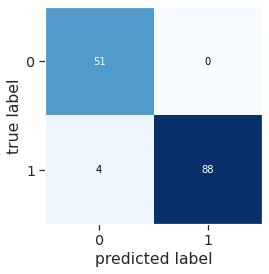

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [25]:
# a z bilbioteki plotly
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

